<a href="https://colab.research.google.com/github/Al1952/Final_Exam_Data_Analysis_with_Python/blob/master/CNN_Classification_of_Horse_or_Human%2C_file_works_8_22_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Download the neccessary data into the Colab Instance

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2023-08-22 19:31:42--  https://storage.googleapis.com/learning-datasets/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  22.9MB/s    in 7.5s    

2023-08-22 19:31:50 (19.0 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2023-08-22 19:31:50--  https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zi

In [ ]:
# Import all the necessary files!
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from keras.preprocessing import image
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow import keras

In [ ]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [ ]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')
# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')
train_horse_names = os.listdir('/tmp/horse-or-human/horses')
print(train_horse_names[:10])
train_human_names = os.listdir('/tmp/horse-or-human/humans')
print(train_human_names[:10])
validation_horse_hames = os.listdir('/tmp/validation-horse-or-human/horses')
print(validation_horse_hames[:10])
validation_human_names = os.listdir('/tmp/validation-horse-or-human/humans')
print(validation_human_names[:10])

['horse05-6.png', 'horse23-0.png', 'horse44-2.png', 'horse03-5.png', 'horse46-5.png', 'horse26-9.png', 'horse13-7.png', 'horse42-5.png', 'horse16-2.png', 'horse01-7.png']
['human14-03.png', 'human03-17.png', 'human17-10.png', 'human02-16.png', 'human06-26.png', 'human07-17.png', 'human14-19.png', 'human15-17.png', 'human11-22.png', 'human12-27.png']
['horse3-198.png', 'horse1-241.png', 'horse2-218.png', 'horse5-083.png', 'horse1-510.png', 'horse2-112.png', 'horse2-254.png', 'horse3-484.png', 'horse5-342.png', 'horse5-259.png']
['valhuman02-12.png', 'valhuman03-09.png', 'valhuman05-02.png', 'valhuman02-00.png', 'valhuman01-17.png', 'valhuman02-11.png', 'valhuman05-26.png', 'valhuman03-04.png', 'valhuman03-23.png', 'valhuman04-18.png']


Let's find out the total number of horse and human images in the directories:

In [ ]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))


total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


Now let's take a look at a few pictures to get a better sense of what they look like. First, configure the matplot parameters:



In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 horse and 8 human pictures. You can rerun the cell to see a fresh batch each time:

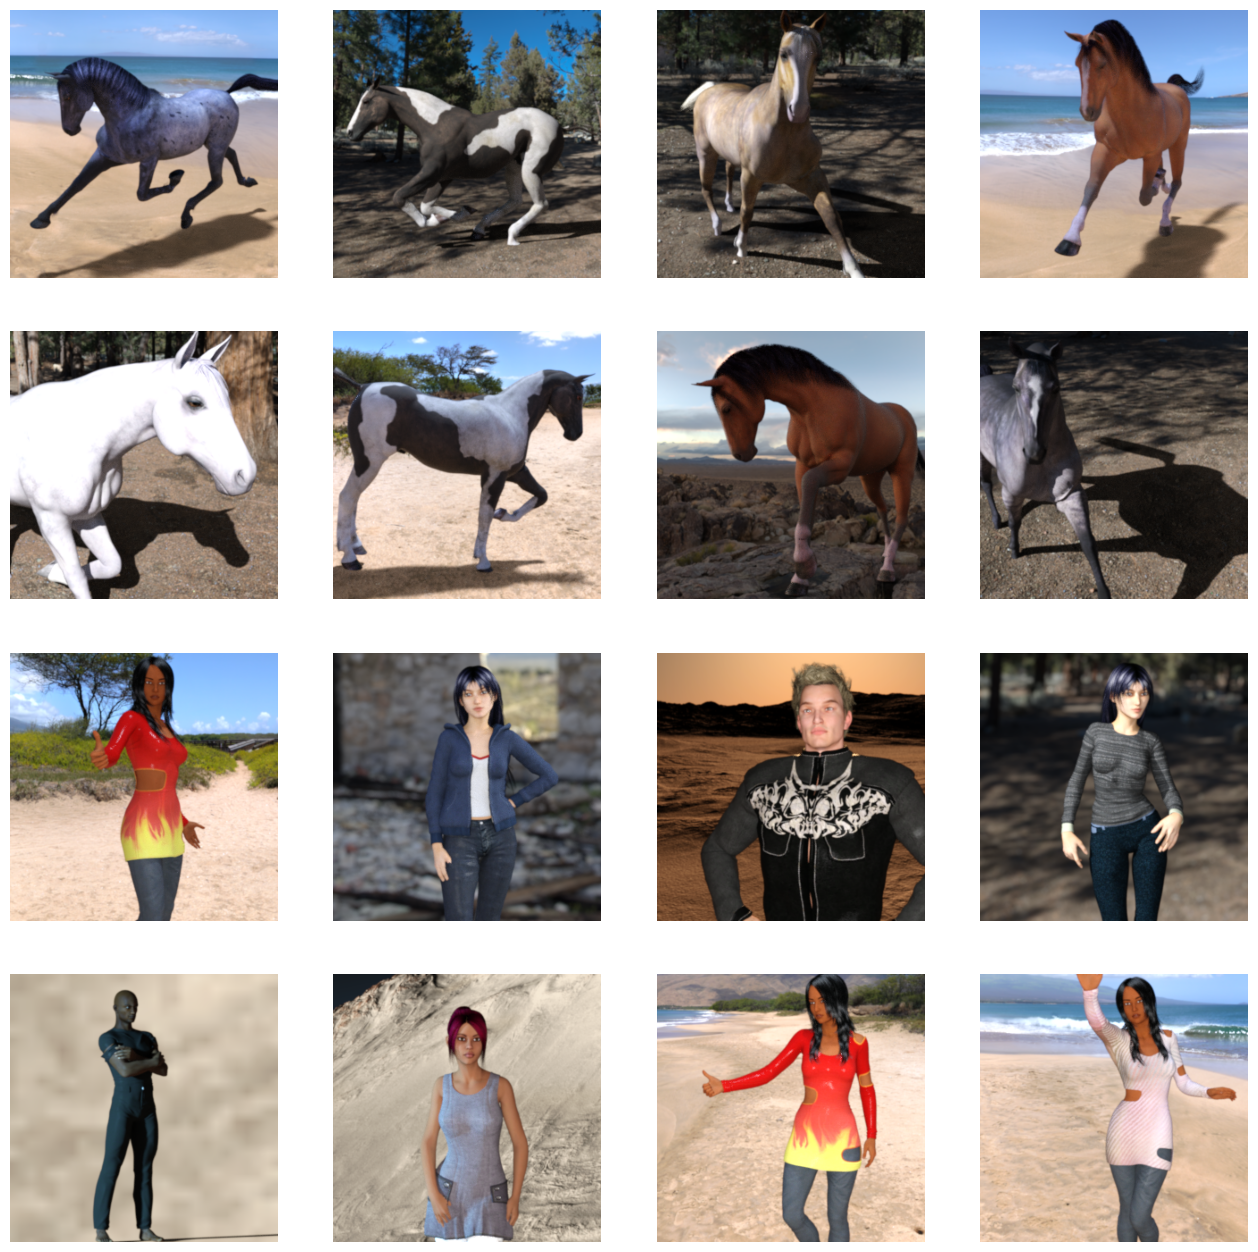

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()



In [ ]:
import tensorflow as tf

## Define your model and optimizer

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class
    # ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 10, 10, 128)     

In [ ]:
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(lr=0.0001)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])

## Organize your data into Generators

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be augmented according to whichever lines are uncommented
# below. We can first try without any of the augmentation beyond the rescaling
train_datagen = ImageDataGenerator(
      rescale=1./255,
      #rotation_range=40,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      #shear_range=0.2,
      #zoom_range=0.2,
      #horizontal_flip=True,
      #fill_mode='nearest'
      )

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(100, 100),  # All images will be resized to 100x100
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human',
        batch_size=32,
        target_size=(100, 100),
        class_mode='binary')


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## Train your model
This may take a little while. Remember we are now building and training relatively complex computer vision models!

In [ ]:
#  CALLBACKS


# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.989 and logs.get('val_acc')>0.85):
      print("\nReached 99.8% accuracy and 90% validation accuracy so cancelling training!")
      self.model.stop_training = True


In [ ]:
# Run this and see how many epochs it should take before the callback
# fires, and stops training at 99.8% accuracy and 90% val accuracy
# (It should take less than 100 epochs)

callbacks = myCallback()

history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1,
      validation_data=validation_generator,
      callbacks=[callbacks]
      )

Epoch 1/15
8/8 [==============================] - 9s 823ms/step - loss: 0.8389 - acc: 0.4939 - val_loss: 0.6924 - val_acc: 0.5000
Epoch 2/15
8/8 [==============================] - 7s 888ms/step - loss: 0.9606 - acc: 0.5050 - val_loss: 0.6666 - val_acc: 0.5078
Epoch 3/15
8/8 [==============================] - 6s 810ms/step - loss: 0.6263 - acc: 0.7227 - val_loss: 0.5345 - val_acc: 0.6133
Epoch 4/15
8/8 [==============================] - 7s 926ms/step - loss: 0.5648 - acc: 0.6787 - val_loss: 0.2823 - val_acc: 0.8750
Epoch 5/15
8/8 [==============================] - 6s 772ms/step - loss: 0.4827 - acc: 0.7853 - val_loss: 0.3690 - val_acc: 0.8789
Epoch 6/15
8/8 [==============================] - 7s 848ms/step - loss: 0.4135 - acc: 0.8165 - val_loss: 0.3561 - val_acc: 0.8945
Epoch 7/15
8/8 [==============================] - 7s 869ms/step - loss: 0.8059 - acc: 0.8220 - val_loss: 0.3078 - val_acc: 0.9102
Epoch 8/15
8/8 [==============================] - 6s 744ms/step - loss: 0.2312 - acc: 0.91

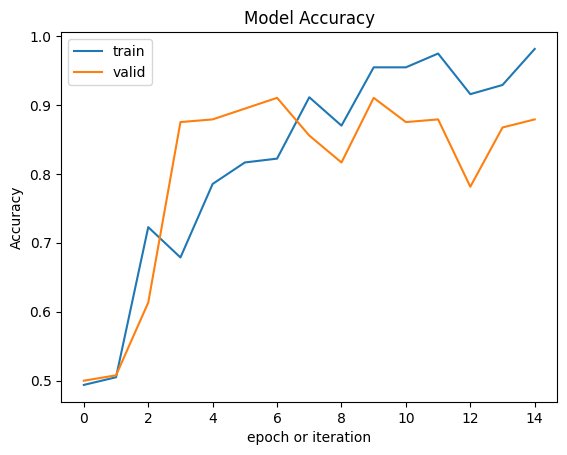

In [ ]:
# Summarize the accuracy.

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch or iteration')
plt.legend(["train", 'valid'], loc = 'upper left')
plt.show()

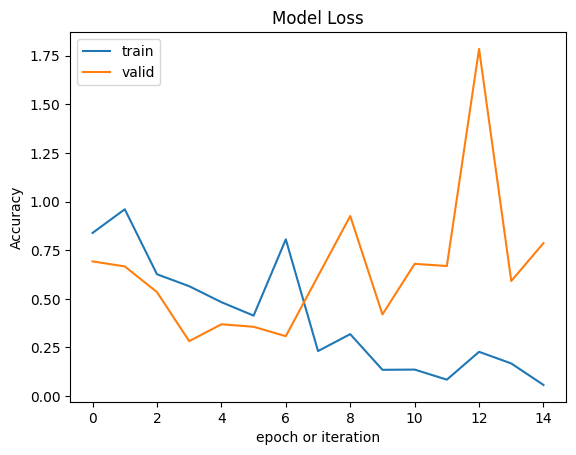

In [ ]:
# Summarize the Loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('epoch or iteration')
plt.legend(["train", 'valid'], loc = 'upper left')
plt.show()

## Run your Model

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a horse or a human. **Was the model correct? Try a couple more images and see if you can confuse it!**

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras import utils

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = utils.load_img(path, target_size=(100, 100))
  x = utils.img_to_array(img)
  x = x / 255.0
  x = np.expand_dims(x, axis=0)

  image_tensor = np.vstack([x])
  classes = model.predict(image_tensor)
  print(classes)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")


Saving Captura de Pantalla 2021-05-18 a la(s) 17.17.26.png to Captura de Pantalla 2021-05-18 a la(s) 17.17.26 (5).png
1/1 [==============================] - 0s 21ms/step
[[6.775671e-06]]
[6.775671e-06]
Captura de Pantalla 2021-05-18 a la(s) 17.17.26 (5).png is a horse


## Finally lets visualize all of the model layers!

1/1 [==============================] - 0s 102ms/step


<ipython-input-43-2712d6f650d3>:50: RuntimeWarning: invalid value encountered in divide
  x /= x.std()


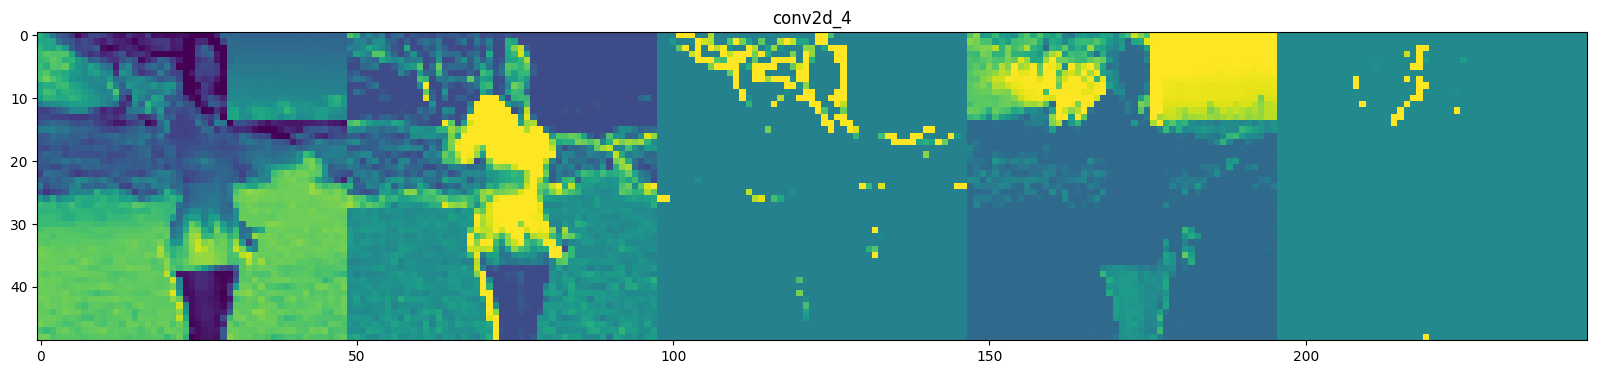

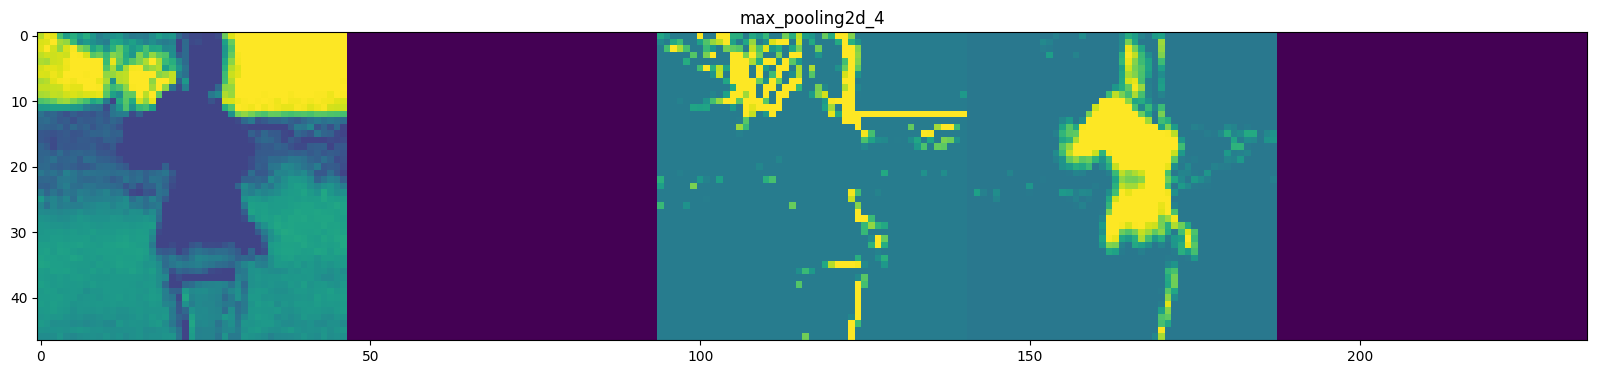

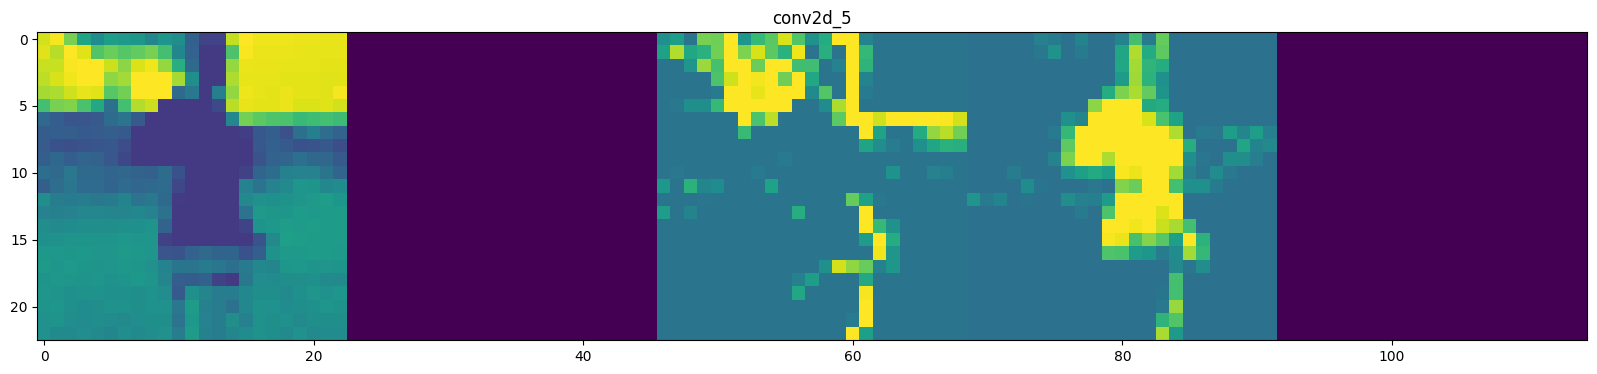

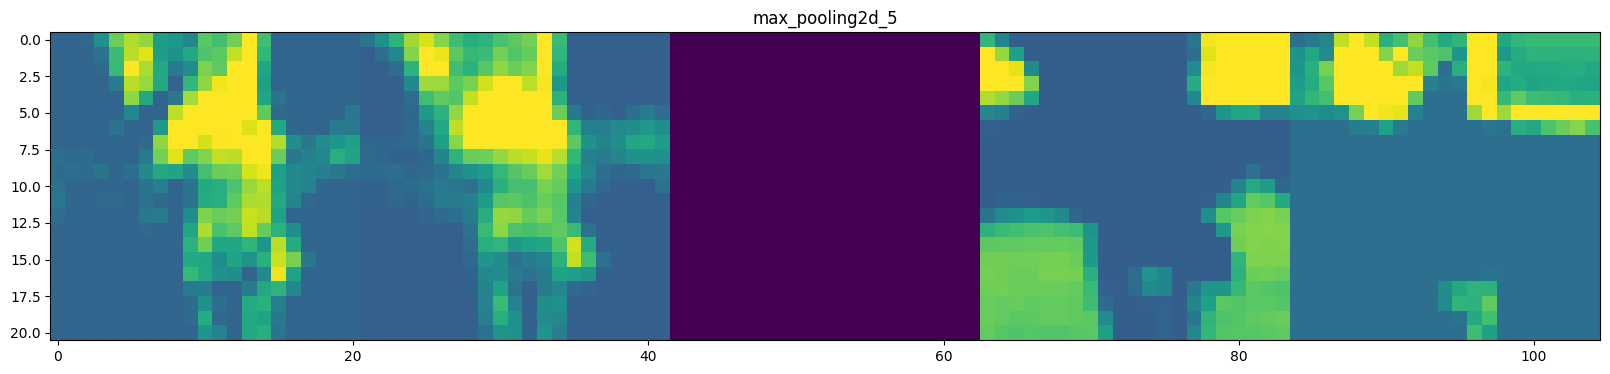

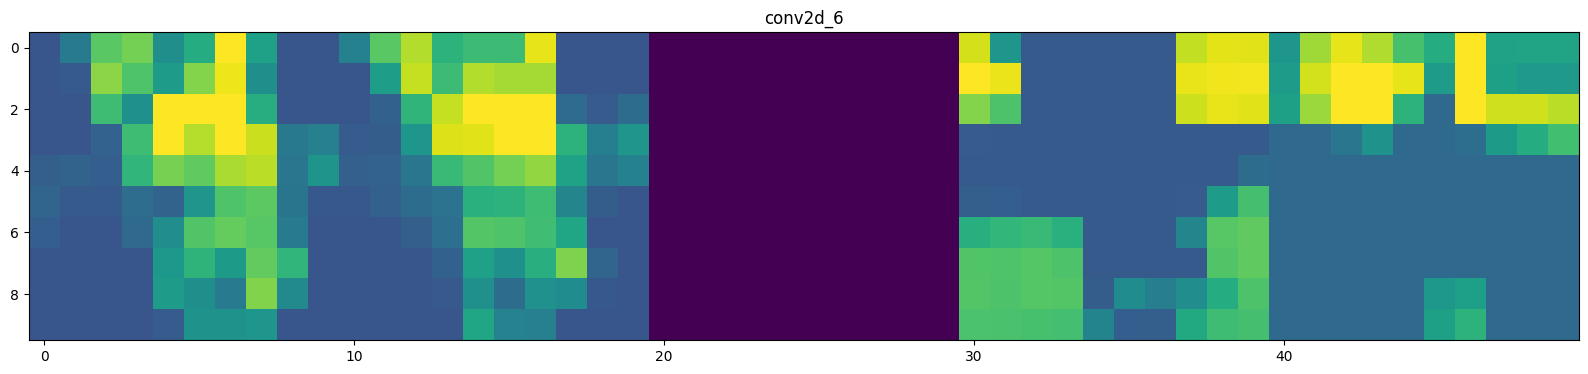

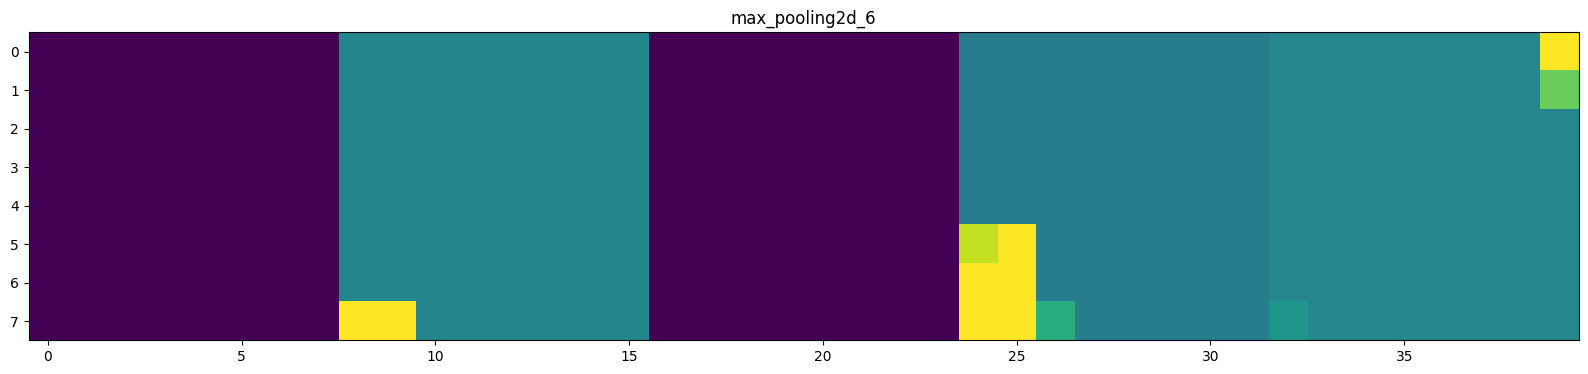

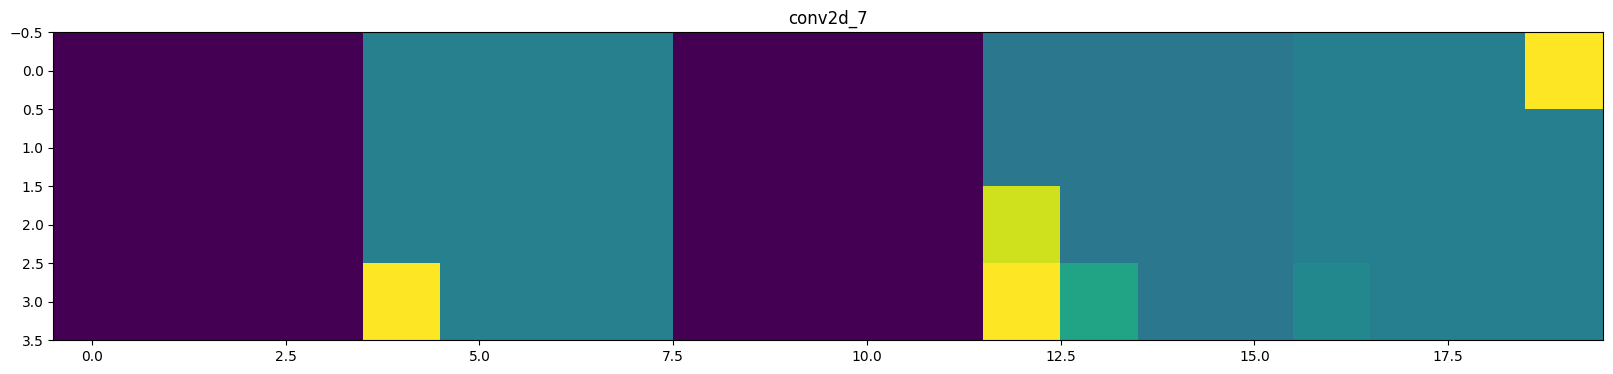

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)
# uncomment the following line if you want to pick the Xth human file manually
img_path = human_img_files[0]

img = load_img(img_path, target_size=(100, 100))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (100, 100, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 100, 100, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    n_features = min(n_features,5) # limit to 5 features for easier viewing
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Clean Up

Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)